In [1]:
#create some t-SNE examples using the MNIST and digits datasets
#https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f

In [2]:
!pip install swat

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Load Python Libraries
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

In [4]:
# Create CAS Connection
#conn = swat.CAS(host, portnum, protocol='http')
#conn.sessionProp.setSessOpt(messageLevel='NONE'); # Suppress CAS Messages

In [5]:
mnist_train = pd.read_csv('/Users/jacksonwalters/Documents/GitHub/t-SNE_examples/mnist/mnist_train.csv')
mnist_test = pd.read_csv('/Users/jacksonwalters/Documents/GitHub/t-SNE_examples/mnist/mnist_test.csv')

In [6]:
#the digits are 28x28 = 784 pixels, which is the number of columns
#there are 60,000 labeled examples in the training data set, and 10,000 labeled examples in the test dataset

display(mnist_train.shape)
display(mnist_test.shape)

(60000, 785)

(10000, 785)

In [7]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# View Label Distribution
# MNIST Labels: 0-9
display(pd.crosstab(index=mnist_train['label'], columns='count'))
display(pd.crosstab(index=mnist_test['label'], columns='count'))

col_0,count
label,
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851


col_0,count
label,
0,980
1,1135
2,1032
3,1010
4,982
5,892
6,958
7,1028
8,974


In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#perform PCA without CAS connection
from sklearn import datasets, decomposition
#separate data and labels
X = mnist_train.drop(columns='label')
y = mnist_train['label']
n_samples = X.shape[0]

In [11]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X.shape

(60000, 784)

In [12]:
#https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca
# We center the data and compute the sample covariance matrix
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

332719.12203541654
332724.66744639154
243279.88432853943
243283.93902593188
211503.84146972408
211507.36524050857


In [13]:
#create pandas dataframes from label and pca transformed data
X_transform = pca.transform(X)
label_df = pd.DataFrame(y,columns=['label'])
mnist_transform_df = pd.DataFrame(X_transform,columns=['score0','score1','score2'])
mnist_train_pca_df = pd.merge(label_df,mnist_transform_df,left_index=True, right_index=True)

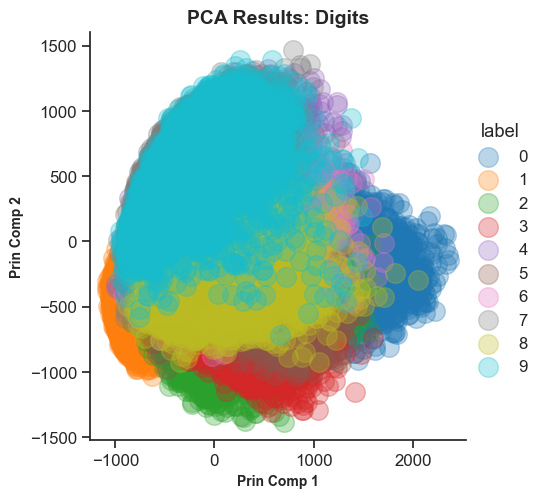

In [14]:
# Plot MNIST PCA

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='score0',
           y='score1',
           data=mnist_train_pca_df,
           fit_reg=False,
           legend=True,
           #size=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [16]:
plt.savefig('pca_MNIST_digits.png')

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_figure'

In [ ]:
#compute t-SNE of MNIST test data

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
#separate data and labels
X = mnist_test.drop(columns='label')
y = mnist_test['label']
n_samples = X.shape[0]

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [ ]:
tsne_results = tsne.fit_transform(X)

In [ ]:
tsne_df = pd.DataFrame(columns=['tsne-2d-one','tsne-2d-two'])
tsne_df['y'] = y
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]

In [ ]:
tsne_df.head()

In [ ]:
#plot the t-SNE results
plt.figure(figsize=(16,10))
plot = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

In [ ]:
fig = plot.get_figure()
fig.savefig("t-SNE_plot_MNIST.png")